1. Proyecto NetworkX. <br>
Escoge un dataset de tu interés (público o datos con los que estás familiarizado). Recuerda que para trabajar con grafos, las entidades, las relaciones entre sí y sus propiedades deben estar bien definidas. Plantea al menos 3 preguntas de negocio que puedan resolverse en base a consultas analíticas y/o métricas de grafos.
- Trabaja con al menos 1000 nodos (0.5)
- Trabaja con al menos 2000 aristas (0.5)
- Combina el potencial de NetworkX con Gephi (1.0)
- Analiza tus resultados (0.5)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
import requests

In [2]:
url = "https://api.gameofthronesquotes.xyz/v1/random/100"


def get_data(url, timeout=10):
    try:
        response = requests.get(url, timeout=timeout)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.HTTPError as e:
        print("Error al obtener los datos de la API: " + str(e))
        return None

In [3]:
data = get_data(url)

<h1>Preguntas </h1>
<ul>
<li>¿Qué casas nobles tienen personajes relacionados entre sí en las frases? </li>
<li>¿Qué frases están relacionadas con múltiples personajes? </li>
<li>¿Qué personajes están más relacionados con ciertas frases?</li>

</ul>

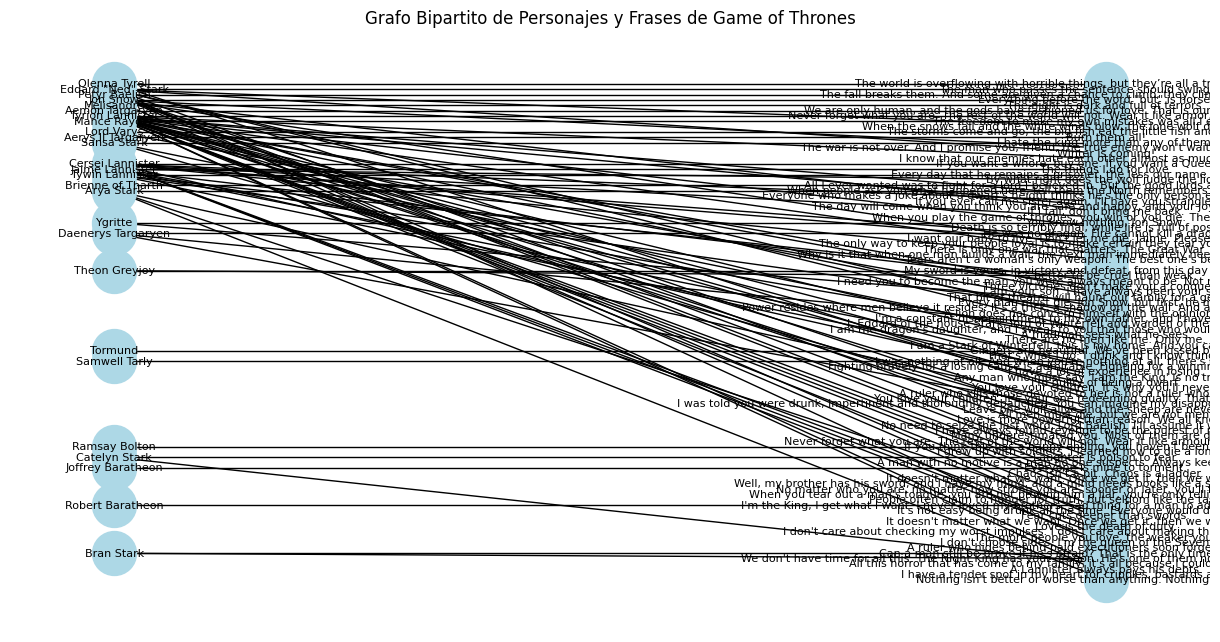

In [4]:
# Crear un grafo bipartito
G = nx.Graph()

# Crear listas separadas para personajes y frases
characters = []
sentences = []

for item in data:
    character_name = item["character"]["name"]
    sentence = item["sentence"]
    
    characters.append(character_name)
    sentences.append(sentence)
    
    # Agregar nodos y bordes al grafo
    G.add_node(character_name, bipartite=0)
    G.add_node(sentence, bipartite=1)
    G.add_edge(character_name, sentence)

# Dibujar el grafo bipartito
pos = {node: (1, index) for index, node in enumerate(characters)}
pos.update({node: (2, index) for index, node in enumerate(sentences)})
plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_color='black', node_color='lightblue', node_shape='o')
plt.title("Grafo Bipartito de Personajes y Frases de Game of Thrones")
plt.axis('off')
plt.show()

In [5]:
output_file = "grafo_game_of_thrones.gexf"
nx.write_gexf(G, output_file)

<h1>Gephi </h1>

<img src="./gephi.PNG" alt="Gephi Emill"/>

<img src="./labDatos.PNG" alt="MarineGEO circle logo"/>